# Importing Dependencies

In [62]:
# https://www.kaggle.com/ronitf/heart-disease-uci/kernels
import warnings, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, sklearn
from sklearn.linear_model import *
from sklearn.cluster import *
from sklearn import *
from numpy import *
warnings.filterwarnings('ignore')
sns.set(style="white")

# Variable Information

* age
* sex (1 = male; 0 = female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# EDA

In [61]:
hrt = pd.read_csv("./heart.csv")
print("Subjects in Data:",hrt.shape[0])
print("Number of Variables:",hrt.shape[1])
print("Null Values:"); heartSeries = hrt.isnull().sum(); print(heartSeries)
hrt.head()

Subjects in Data: 303
Number of Variables: 14
Null Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
hrt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [21]:
hrt.sample(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0


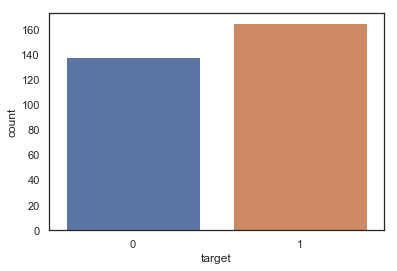

In [22]:
# Distribution by Target Example
targetCounts = sns.countplot(x="target",data=hrt)
plt.show()
# roughly equivalent count between the two targets

Text(0,0.5,'Count')

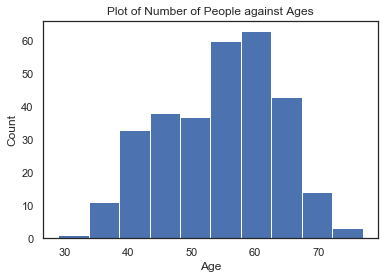

In [41]:
plt.hist(x="age",data=hrt)
plt.title("Plot of Number of People against Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [49]:
# Observing K-means Clusters Among Resting EKG results
# Normalize Data
minMaxProcess = preprocessing.MinMaxScaler().fit_transform(hrt)
scaledHrt = pd.DataFrame(minMaxProcess, index=hrt.index, columns=hrt.columns[:])
scaledHrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


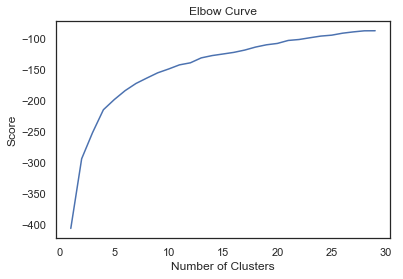

In [53]:
# Choosing Cluster Size
clusterSizes = range(1,30)
kMeans = [KMeans(n_clusters=val) for val in clusterSizes]
kScore = []
for index in range(len(kMeans)):
    kScore.append(kMeans[index].fit(scaledHrt).score(scaledHrt))

plt.plot(clusterSizes,kScore)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
# Consider elbow region of the curve, k=5 clusters

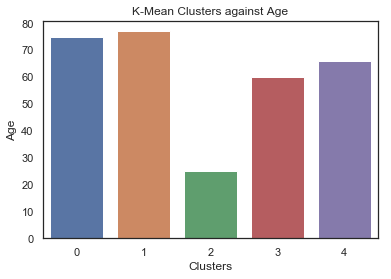

In [54]:
hrtKMeans = KMeans(n_clusters=5)
hrtKMeans.fit(scaledHrt)
hrt["cluster"]=hrtKMeans.labels_
# Analyze 5 clusters
# By Age
clustersPlot = sns.barplot(x=np.arange(0,5,1),y=hrt.groupby(["cluster"]).count()["age"].values)
plt.title("K-Mean Clusters against Age")
plt.xlabel("Clusters")
plt.ylabel("Age")
plt.show()
# Cluster 1 has the greatest age (~78) while Cluster 2 has the lowest (~25)

In [56]:
# Cluster Statistics
hrt.groupby(["cluster"]).mean() # we see average ages among the clusters are roughly the same

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cluster,,,,,,,,,,,,,,
0,49.866667,1.000000,1.320000,128.333333,232.493333,0.000000,0.600000,162.826667,0.173333,0.596000,1.653333,0.360000,2.186667,1.000000
1,56.337662,0.818182,0.155844,135.000000,254.558442,0.181818,0.480519,132.909091,1.000000,1.762338,1.064935,1.103896,2.584416,0.012987
2,56.640000,0.760000,1.960000,134.560000,240.680000,1.000000,0.520000,156.880000,0.080000,0.672000,1.520000,0.600000,2.160000,0.920000
3,56.883333,0.833333,0.816667,133.600000,246.866667,0.100000,0.416667,145.983333,0.000000,1.328333,1.300000,1.250000,2.533333,0.000000
4,54.030303,0.000000,1.272727,128.515152,253.803030,0.000000,0.606061,154.787879,0.106061,0.577273,1.545455,0.287879,2.000000,1.000000


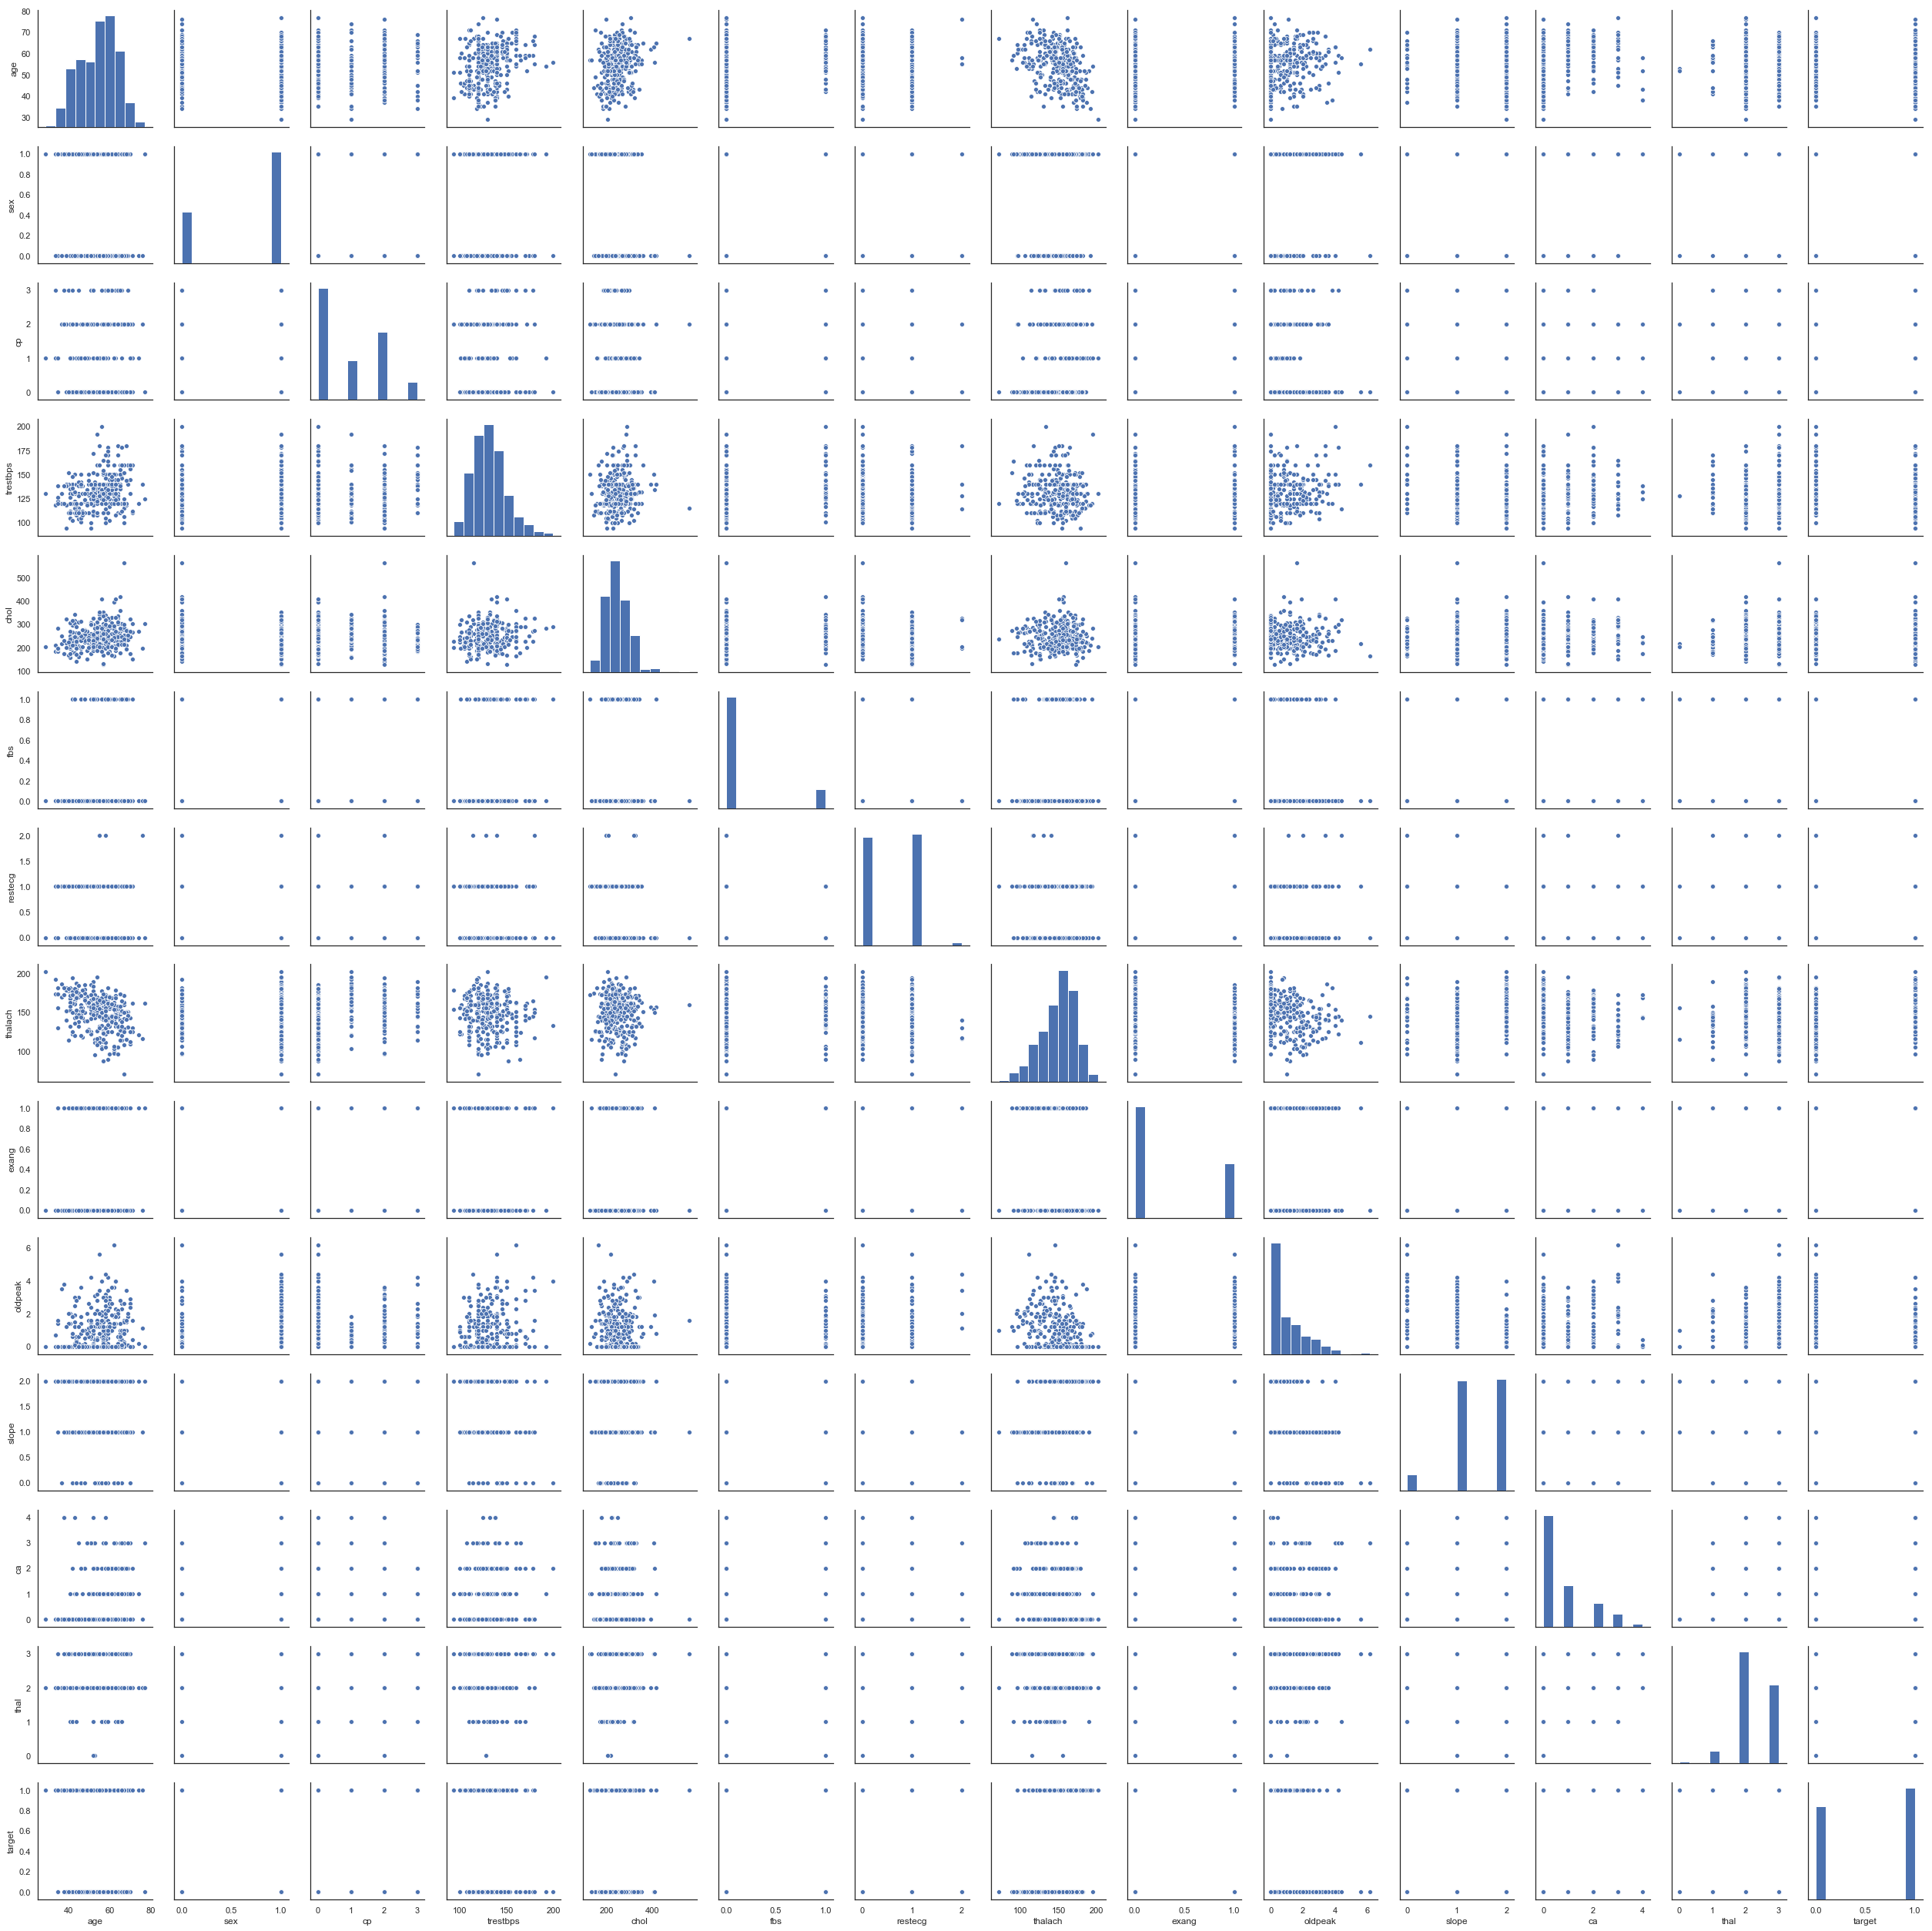

In [64]:
# Correlation Plots 
hrtCorPlots = sns.pairplot(hrt)

# Modeling 

In [63]:
# we can observe a basic regression of age ploted regressed against other independent variables
# Using Logistic Regression on Heart Disease UCI 
hrtLog = LogisticRegression()
params = 
hrtLogModel = GridSearchCV(hrtLog,param_grid=params,cv=10)
hrtLogModel.fit()
# for modeling, it would be best to split the data into test and train datasets



# Future Direction

**Analysis and Modeling on the Heart Disease UCI dataset can be greatly expanded upon. Aside from exploration of correlations and a plethora of modeling, other routes of analysis may involve **